In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [2]:
#1- Obtener el país con mayor cantidad de gente vacunada.
#2- Realizar una visualización que permita compararla cantidad 
#de gente vacunada(vaccinated), con la que recibió ambas dosis 
#(fullyvaccinated). Pueden tomar los 10 países conmayor vacunación, 
#ya sea en número como en porcentaje.

In [3]:
df = pd.read_csv('country_vaccinations.csv',usecols=['country','people_vaccinated','people_fully_vaccinated','date'],dtype={'country':'string'})

In [4]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

In [5]:
df.head()

,country,date,people_vaccinated,people_fully_vaccinated
0,Afghanistan,2021-02-22,0.0,NaN
1,Afghanistan,2021-02-23,NaN,NaN
2,Afghanistan,2021-02-24,NaN,NaN
3,Afghanistan,2021-02-25,NaN,NaN
4,Afghanistan,2021-02-26,NaN,NaN


In [6]:
max_paises = df.groupby('country').agg({'people_vaccinated':'max'})

In [7]:
max_paises = max_paises.sort_values('people_vaccinated',ascending=False)

In [8]:
max_paises=max_paises.head(25)

In [9]:
max_paises.head(20)

,people_vaccinated
country,
United States,123917385.0
India,100179199.0
United Kingdom,32326604.0
England,27172302.0
Brazil,24197321.0
Germany,14058329.0
Turkey,11556291.0
France,11366175.0
Indonesia,10457337.0


Text(0.5, 0, 'Paises')

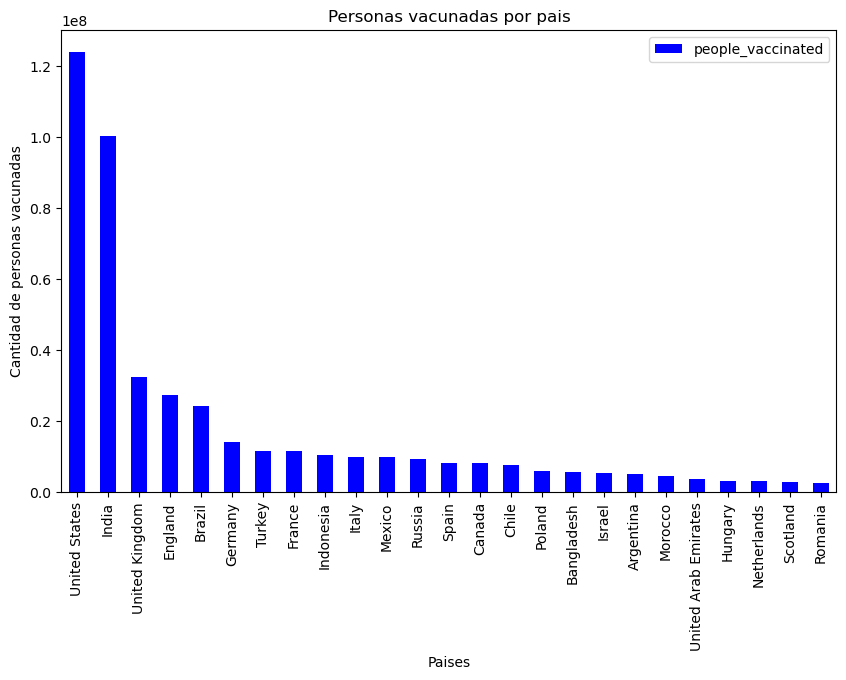

In [10]:
max_paises.plot(kind='bar',title='Personas vacunadas por pais',linewidth=2,figsize=(10,6),color='blue');
ax=plt.gca()
ax.set_ylabel('Cantidad de personas vacunadas')
ax.set_xlabel('Paises')

In [11]:
df['people_vaccinated'].nlargest(5)

11376    123917385.0
11375    122295530.0
11374    120848490.0
11373    119242902.0
11372    117142879.0
Name: people_vaccinated, dtype: float64

In [15]:
argentina=df.loc[df['country'].str.contains('Argentina'),:]

In [19]:
argentina.loc[argentina['date']=='2021-01-20',:]

,country,date,people_vaccinated,people_fully_vaccinated
418,Argentina,2021-01-20,243539.0,4394.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11681 entries, 0 to 11680
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   country                  11681 non-null  string        
 1   date                     11681 non-null  datetime64[ns]
 2   people_vaccinated        6261 non-null   float64       
 3   people_fully_vaccinated  4508 non-null   float64       
dtypes: datetime64[ns](1), float64(2), string(1)
memory usage: 365.2 KB


In [22]:
(df.memory_usage(deep=False)/(1024**2)).sum() # = 0.36 Mb

0.356597900390625

In [35]:
htmp=df.pivot_table(index='people_vaccinated',columns='country',values='date',aggfunc=np.max).stack()

people_vaccinated  country            
0.0                Afghanistan           2021-02-22
                   Albania               2021-01-10
                   Angola                2021-03-01
                   Anguilla              2021-02-04
                   Antigua and Barbuda   2021-02-16
                                            ...    
117142879.0        United States         2021-04-10
119242902.0        United States         2021-04-11
120848490.0        United States         2021-04-12
122295530.0        United States         2021-04-13
123917385.0        United States         2021-04-14
Length: 6170, dtype: datetime64[ns]

In [36]:
g=sns.heatmap(htmp,linewidths=5,cmap='YlnGbBu')
g.set_title('proy',fontsize=22)

NameError: name 'sns' is not defined